<a href="https://colab.research.google.com/github/someshnaik777/Hotel-booking-analysis/blob/main/Hotel_booking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HOTEL BOOKING EXPLORATORY DATA ANALYSIS


PROBLEM STATEMENT:
Explore and analyse the data to discover important factors that governs the booking

BUSINESS CONTEXT:
Have you ever wondered when the best time of the year to book a hotel room is?or the optimal length to stay to get the best daily rate? What if you wanted to predict whether or not a hotel is likely to receive a disproportionately high number of special requests?This hotel booking dataset can help you explore those questions!This dataset contains booking information for a city hotel and a resort hotel and contains information like when the booking was made,length of stay,the number of adults,childrens and/or baby and the number of available parking space among other things

Understanding data


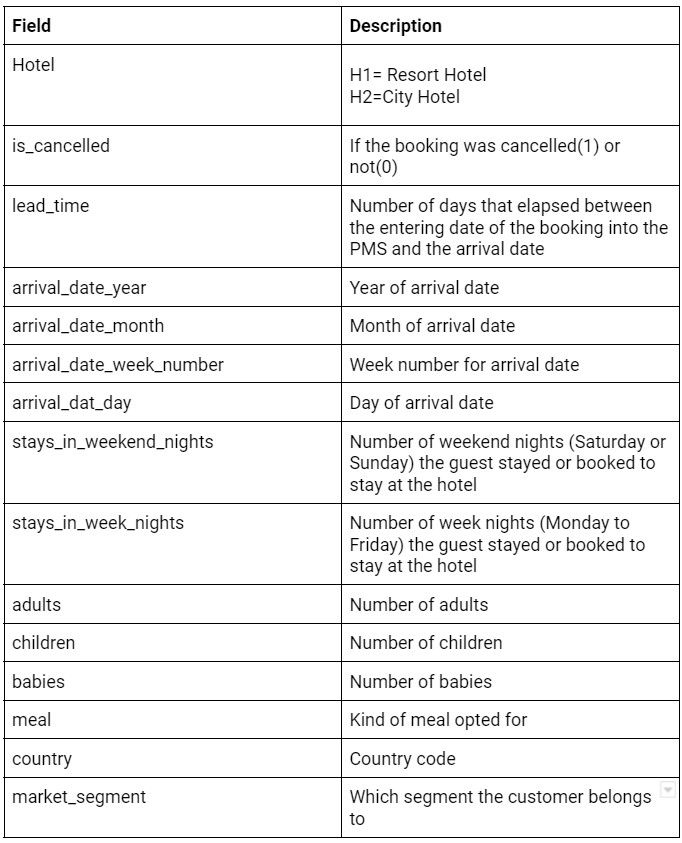

In [ ]:
#Importing Necessary libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd   # data manipulation
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt  # data vizualization
from matplotlib import rcParams
import seaborn as sns
plt.style.use("ggplot")   #apply some cool styling
rcParams['figure.figsize'] = (12, 6)

Importing a working dataset 

In [ ]:
pfrom pandas import DataFrame
url = 'https://raw.githubusercontent.com/someshnaik777/Hotel-booking-analysis/main/Hotel%20Bookings.csv'
df = pd.read_csv(url)

Exploring the data

In [ ]:
df.head()

,Hotel,Canceled,LeadTime,ArrivingYear,ArrivingMonth,ArrivingWeek,ArrivingDate,WeekendStay,WeekStay,Adults,...,WaitingDays,CustomerType,ADR,ParkSpace,SpecialRequest,Reservation,ReservationDate,Kids,total_members,Arrival Date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,Transient,0.0,0.0,0.0,Check-Out,01-07-2015,0.0,2.0,2015-07-01
1,Resort Hotel,0,500,2015,July,27,1,0,0,2,...,0,Transient,0.0,0.0,0.0,Check-Out,01-07-2015,0.0,2.0,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,Transient,75.0,0.0,0.0,Check-Out,02-07-2015,0.0,1.0,2015-07-01
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,Transient,75.0,0.0,0.0,Check-Out,02-07-2015,0.0,1.0,2015-07-01
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,Transient,98.0,0.0,1.0,Check-Out,03-07-2015,0.0,2.0,2015-07-01


In [ ]:
df.tail()

,Hotel,Canceled,LeadTime,ArrivingYear,ArrivingMonth,ArrivingWeek,ArrivingDate,WeekendStay,WeekStay,Adults,...,WaitingDays,CustomerType,ADR,ParkSpace,SpecialRequest,Reservation,ReservationDate,Kids,total_members,Arrival Date
80957,City Hotel,1,96,2015,December,51,19,2,2,2,...,0,Contract,76.50,0.0,2.0,Canceled,30-11-2015,0.0,2.0,2015-12-19
80958,City Hotel,1,18,2015,December,49,4,1,2,2,...,0,Contract,93.08,0.0,1.0,Canceled,30-11-2015,0.0,2.0,2015-12-04
80959,City Hotel,0,4,2015,November,48,27,1,2,2,...,0,Transient,55.00,0.0,0.0,Check-Out,30-11-2015,0.0,2.0,2015-11-27
80960,City Hotel,0,4,2015,November,48,27,1,2,2,...,0,Contract,87.00,0.0,1.0,Check-Out,30-11-2015,0.0,2.0,2015-11-27
80961,City Hotel,0,2,2015,November,48,27,1,2,2,...,0,Transient,59.75,0.0,1.0,Check-Out,30-11-2015,0.0,2.0,2015-11-27


In [ ]:
df.shape # It returns the number of columns and length of the dataset(dimensionality of the dataset)

(80963, 32)

In [ ]:
df.describe() # It returns the descriptive information about the dataset

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,80963.000000,80963.000000,80963.000000,80963.000000,80963.000000,80963.000000,80963.000000,80963.000000,80959.000000,80963.000000,80963.000000,80963.000000,80963.000000,80963.000000,69061.000000,4523.000000,80963.000000,80962.000000,80962.000000,80962.000000
mean,0.532157,113.207700,2016.046009,28.097230,15.730902,0.984203,2.675074,1.858293,0.102027,0.008461,0.033484,0.111767,0.151625,0.204155,114.090702,198.427592,2.861529,98.251350,0.071960,0.470109
std,0.498968,112.490725,0.753127,13.588102,8.777015,1.051024,2.073205,0.597823,0.398824,0.103017,0.179899,1.013481,1.679101,0.635900,119.224397,135.354259,20.305248,54.245266,0.262407,0.747704
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,21.000000,2015.000000,17.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,67.000000,0.000000,62.000000,0.000000,0.000000
50%,1.000000,77.000000,2016.000000,29.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.000000,204.000000,0.000000,89.100000,0.000000,0.000000
75%,1.000000,175.000000,2017.000000,39.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,281.000000,0.000000,121.737500,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,20.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
df.info() # It returns the count of non null values and integer types and memomory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80963 entries, 0 to 80962
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           80963 non-null  object 
 1   is_canceled                     80963 non-null  int64  
 2   lead_time                       80963 non-null  int64  
 3   arrival_date_year               80963 non-null  int64  
 4   arrival_date_month              80963 non-null  object 
 5   arrival_date_week_number        80963 non-null  int64  
 6   arrival_date_day_of_month       80963 non-null  int64  
 7   stays_in_weekend_nights         80963 non-null  int64  
 8   stays_in_week_nights            80963 non-null  int64  
 9   adults                          80963 non-null  int64  
 10  children                        80959 non-null  float64
 11  babies                          80963 non-null  int64  
 12  meal                            

Data Cleaning

In [ ]:
# Checking the missing values in the column
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             487
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             11902
company                           76440


In [ ]:
# Column wise null percentage
print(round(100*(df.isnull().sum()/len(df.index)),2))

hotel                              0.00
is_canceled                        0.00
lead_time                          0.00
arrival_date_year                  0.00
arrival_date_month                 0.00
arrival_date_week_number           0.00
arrival_date_day_of_month          0.00
stays_in_weekend_nights            0.00
stays_in_week_nights               0.00
adults                             0.00
children                           0.00
babies                             0.00
meal                               0.00
country                            0.60
market_segment                     0.00
distribution_channel               0.00
is_repeated_guest                  0.00
previous_cancellations             0.00
previous_bookings_not_canceled     0.00
reserved_room_type                 0.00
assigned_room_type                 0.00
booking_changes                    0.00
deposit_type                       0.00
agent                             14.70
company                           94.41


Drop unnecessary columns

In [ ]:
df=df.drop([ 'agent', 'company'],axis=1) #dropping the column with highest missing value

Country has 488 rows with the NaN values,488 rows out of 119390 is negligible hence we will just remove the unnecessary column

In [ ]:
df = df.dropna(axis = 0)

In [ ]:
df.isnull().sum() #checking the cleaned data

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

Lets Rename the columns for better readability

In [ ]:
df.columns = ['Hotel', 'Canceled', 'LeadTime', 'ArrivingYear', 'ArrivingMonth', 'ArrivingWeek','ArrivingDate', 'WeekendStay',
              'WeekStay', 'Adults', 'Children', 'Babies', 'Meal','Country', 'Segment', 'DistChannel','RepeatGuest', 'PrevCancel',
              'PrevBookUncanceled', 'BookRoomType','AssignRoomType', 'ChangeBooking', 'DepositType', 'WaitingDays', 
              'CustomerType', 'ADR','ParkSpace', 'SpecialRequest','Reservation', 'ReservationDate']


Let's check our data now

In [ ]:
print(df)

              Hotel  Canceled  LeadTime  ArrivingYear ArrivingMonth  \
0      Resort Hotel         0       342          2015          July   
1      Resort Hotel         0       737          2015          July   
2      Resort Hotel         0         7          2015          July   
3      Resort Hotel         0        13          2015          July   
4      Resort Hotel         0        14          2015          July   
...             ...       ...       ...           ...           ...   
80957    City Hotel         1        96          2015      December   
80958    City Hotel         1        18          2015      December   
80959    City Hotel         0         4          2015      November   
80960    City Hotel         0         4          2015      November   
80961    City Hotel         0         2          2015      November   

       ArrivingWeek  ArrivingDate  WeekendStay  WeekStay  Adults  ...  \
0                27             1            0         0       2  ...   
1

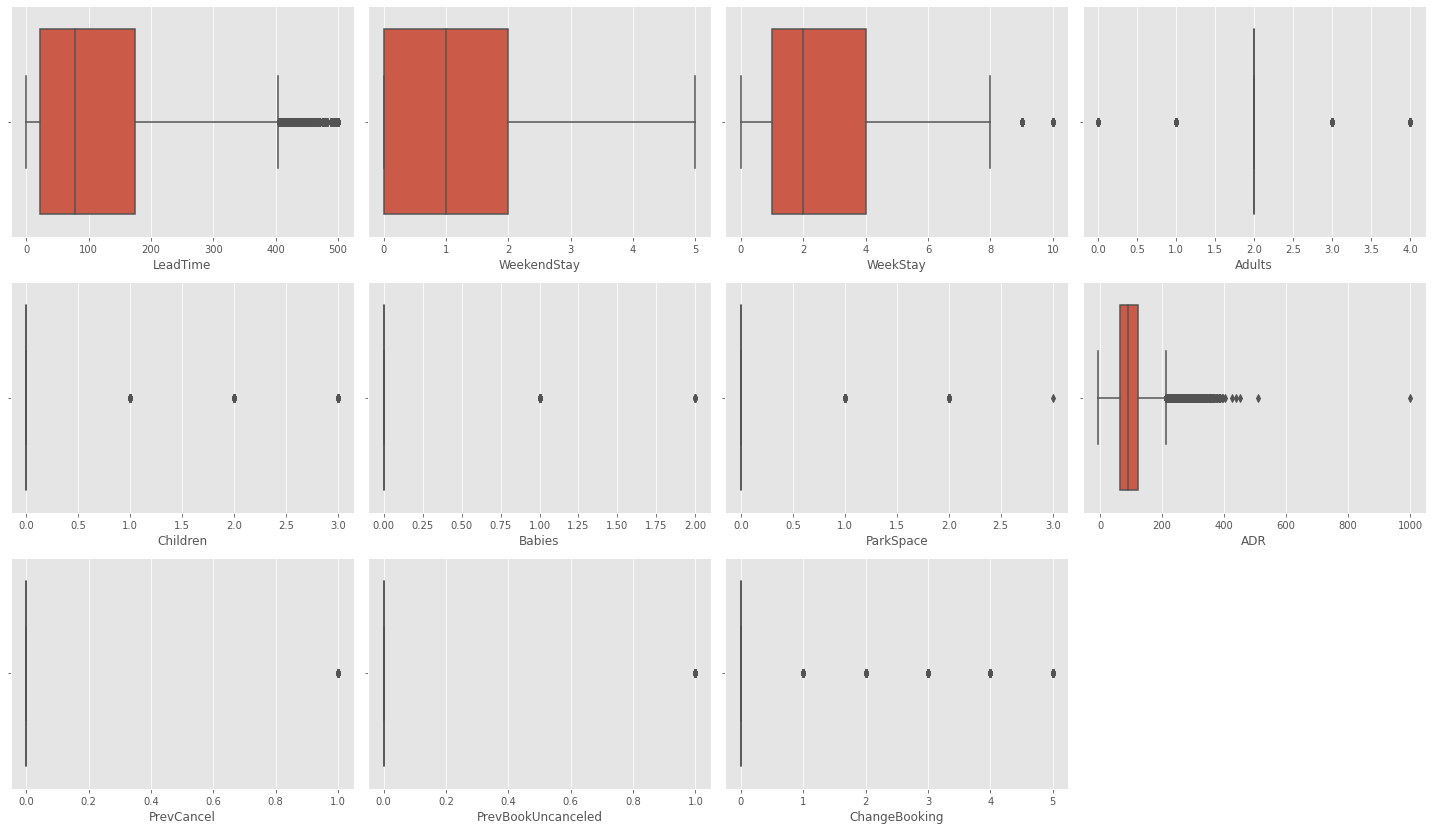

In [ ]:
# Creating a boxplot for Outlier detection
columns = ['LeadTime', 'WeekendStay', 'WeekStay', 'Adults', 'Children', 'Babies', 'ParkSpace', 'ADR', 'PrevCancel', 'PrevBookUncanceled', 'ChangeBooking']
n = 1
plt.figure(figsize=(20,15))

for column in columns:
  plt.subplot(4,4,n)
  n = n+1
  sns.boxplot(df[column])
  plt.tight_layout()

Treating the outliers

In [ ]:
df.loc[df.LeadTime > 500, 'LeadTime'] = 500
df.loc[df.WeekendStay >=  5, 'WeekendStay'] = 5
df.loc[df.Adults > 4, 'Adults'] = 4
df.loc[df.PrevBookUncanceled > 0, 'PrevBookUncanceled'] = 1
df.loc[df.PrevCancel > 0, 'PrevCancel'] = 1
df.loc[df.WeekStay > 10, 'WeekStay'] = 10
df.loc[df.ChangeBooking > 5, 'ChangeBooking'] = 5
df.loc[df.Babies > 8, 'Babies'] = 0
df.loc[df.ParkSpace > 5, 'ParkSpace'] = 0
df.loc[df.Children > 8, 'Children'] = 0
df.loc[df.ADR > 1000, 'ADR'] = 1000

Now we have treated the outliers
Time to prepare the data

In [ ]:
#Lets combine children and babies together as kids
df['Kids'] = df.Children + df.Babies

#Combine total members by adding kids and adults
df['total_members'] = df.Kids + df.Adults

In [ ]:
#convert the datatypes to string
df['ArrivingYear'] = df['ArrivingYear'].astype('str')
df['ArrivingMonth'] = df['ArrivingMonth'].astype('str')
df['ArrivingDate'] = df['ArrivingDate'].astype('str')

df['Canceled'] = df['Canceled'].astype('str')
df['RepeatGuest'] = df['RepeatGuest'].astype('str')

In [ ]:
# Lets convert arrival date to datetime
df['Arrival Date'] = df['ArrivingDate'] + '-' + df['ArrivingMonth'] + '-' + df['ArrivingYear']
df['Arrival Date'] = pd.to_datetime(df['Arrival Date'], errors='coerce')

In [ ]:
confirmed_bookings = df[df.Canceled=='0']

In [ ]:
import datetime as dt
confirmed_bookings['ArrivingMonth'] = df['Arrival Date'].dt.month
final=confirmed_bookings['ArrivingMonth'].value_counts().sort_index()
final

1     2192
2     2465
3     2799
4     2767
5     2930
6     2133
7     3682
8     4544
9     4170
10    4632
11    2863
12    2280
Name: ArrivingMonth, dtype: int64

In [ ]:
# check for missing value
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             487
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             11902
company                           76440


Dropping the rows having all these zero at the same time because will mean that the hotel/room was not even booked.

In [ ]:
filter = (df.children == 0) & (df.adults == 0) & (df.babies == 0)
df[~filter]#dropped the children,babies and adults column

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0.0,0.0,Check-Out,01-07-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0.0,0.0,Check-Out,01-07-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0.0,0.0,Check-Out,02-07-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0.0,0.0,Check-Out,02-07-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0.0,1.0,Check-Out,03-07-2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80958,City Hotel,1,18,2015,December,49,4,1,2,2,...,No Deposit,9.0,NaN,0,Contract,93.08,0.0,1.0,Canceled,30-11-2015
80959,City Hotel,0,4,2015,November,48,27,1,2,2,...,No Deposit,28.0,NaN,0,Transient,55.00,0.0,0.0,Check-Out,30-11-2015
80960,City Hotel,0,4,2015,November,48,27,1,2,2,...,No Deposit,9.0,NaN,0,Contract,87.00,0.0,1.0,Check-Out,30-11-2015
80961,City Hotel,0,2,2015,November,48,27,1,2,2,...,No Deposit,7.0,NaN,0,Transient,59.75,0.0,1.0,Check-Out,30-11-2015


We’ve now cleaned up and prepared the dataset for analysis.

HYPOTHESIS/ASSUMPTIONS

Exploratory data analysis

In [ ]:
df.country # There are multiple bookings made from the same country and this data is the representation of that all

0        PRT
1        PRT
2        GBR
3        GBR
4        GBR
        ... 
80958    PRT
80959    DEU
80960    DEU
80961    AUT
80962    NLD
Name: country, Length: 80963, dtype: object

We need to first check the unique(no repetition) countries from where the bookings are made

In [ ]:
df.country.nunique() # This shows there is a total of 177 countries from where the bookings are made to these 2 hotels

153

We can identify the countries with the highest number of bookings using the value_counts method

In [ ]:
top_countries_with_codes = df.country.value_counts().head(10)
top_countries_with_codes

PRT    40216
GBR     8720
ESP     6116
FRA     4453
DEU     2839
IRL     2637
ITA     2100
BRA     1274
BEL     1047
USA     1043
Name: country, dtype: int64

We can visualize this information using a bar chart.

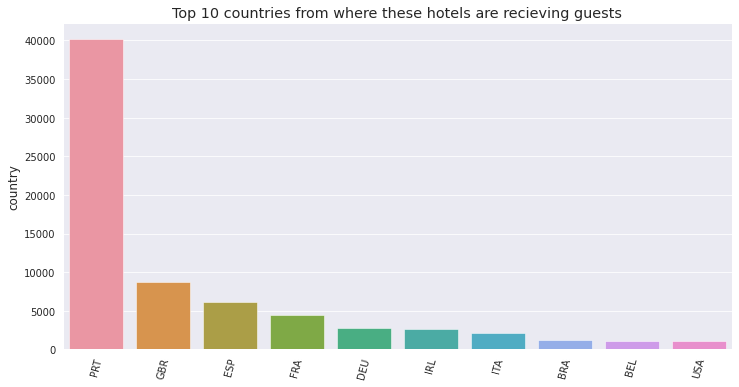

In [ ]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Top 10 countries from where these hotels are recieving guests')
sns.barplot(x=top_countries_with_codes.index, y=top_countries_with_codes)

It appears that a disproportionately high number of bookings are from Portugal, probably because the hotel is located in Portugal itself. The second country is the United Kingdom which is approx. 75% behind.

Let's check Countries with highest booking

In [ ]:
top_countries = df.country.value_counts().head(10)
top_countries

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
Name: country, dtype: int64

Let's check country wise guests

In [ ]:
country_wise_guests = df[df['is_canceled'] == 0]['country'].value_counts().reset_index()
country_wise_guests.columns = ['country', 'No of guests']
country_wise_guests

,country,No of guests
0,PRT,21071
1,GBR,9676
2,FRA,8481
3,ESP,6391
4,DEU,6069
...,...,...
160,BHR,1
161,DJI,1
162,MLI,1
163,NPL,1


Let’s check out the top 10 countries from where the guests are coming and see if there is any change in the data on a number of bookings(with cancellation included) and the number of bookings without cancellation

In [ ]:
top_countries_guests = country_wise_guests.head(10)
top_countries_guests

,country,No of guests
0,PRT,21071
1,GBR,9676
2,FRA,8481
3,ESP,6391
4,DEU,6069
5,IRL,2543
6,ITA,2433
7,BEL,1868
8,NLD,1717
9,USA,1596


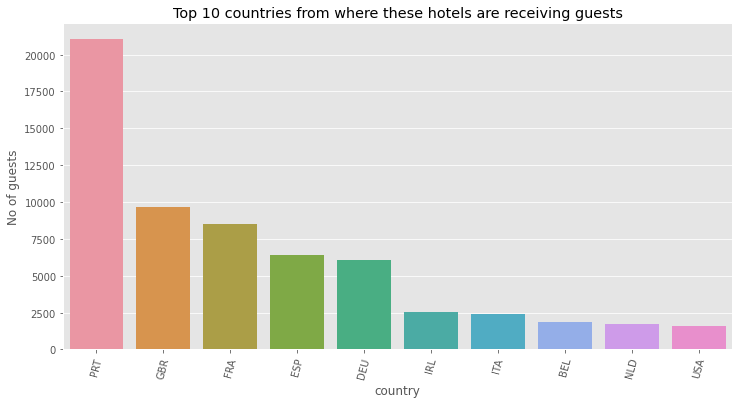

In [ ]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Top 10 countries from where these hotels are receiving guests')
sns.barplot(x=top_countries_guests.country, y=top_countries_guests['No of guests']);

As we can see there is a slight change in the data after the changes.Brazil is nowhere to be seen

In [ ]:
resort_hotel = df.loc[(df["hotel"] == "Resort Hotel") & (df["is_canceled"] == 0)]
city_hotel = df.loc[(df["hotel"] == "City Hotel") & (df["is_canceled"] == 0)]

In [ ]:
# Counting adults and children as paying guests only, not babies.

resort_hotel["adr_pp"] = resort_hotel["adr"] / (resort_hotel["adults"] + resort_hotel["children"])

To calculate the mean or max, we have to remove the infinite values in the dataset. Let's replace the infinite with zero

In [ ]:
resort_hotel_filtered = resort_hotel.replace([np.inf, -np.inf], 0)

In [ ]:
city_hotel["adr_pp"] = city_hotel["adr"] / (city_hotel["adults"] + city_hotel["children"])

In [ ]:
city_hotel_filtered = city_hotel.replace([np.inf, -np.inf], 0)

Now, let's print the output

In [ ]:
print("""From all non-canceled bookings, the average prices are:
Resort hotel: {:.2f} € per night and person.
City hotel: {:.2f} € per night and person."""
      .format(resort_hotel_filtered["adr_pp"].mean(), city_hotel_filtered["adr_pp"].mean()))

From all non-canceled bookings, the average prices are:
Resort hotel: 47.49 € per night and person.
City hotel: 59.23 € per night and person.


In [ ]:
# normalize price per night (adr):

df["adr_pp"] = df["adr"] / (df["adults"] + df["children"])
df_guests = df.loc[df["is_canceled"] == 0]
df_guests

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,adr_pp
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,0.000000
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,0.000000
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,75.000000
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,75.000000
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03,49.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06,48.070000
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07,75.143333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07,78.855000
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07,52.200000


In [ ]:
# only actual gusts

room_prices = df_guests[["hotel", "reserved_room_type", "adr_pp"]].sort_values("reserved_room_type")
room_prices

,hotel,reserved_room_type,adr_pp
80541,City Hotel,A,68.850
90111,City Hotel,A,55.675
90112,City Hotel,A,49.830
90114,City Hotel,A,64.000
90115,City Hotel,A,64.500
...,...,...,...
26937,Resort Hotel,H,80.500
14570,Resort Hotel,L,82.000
15855,Resort Hotel,L,86.000
911,Resort Hotel,L,100.000


Let's plot a boxplot to understand the data in a better way

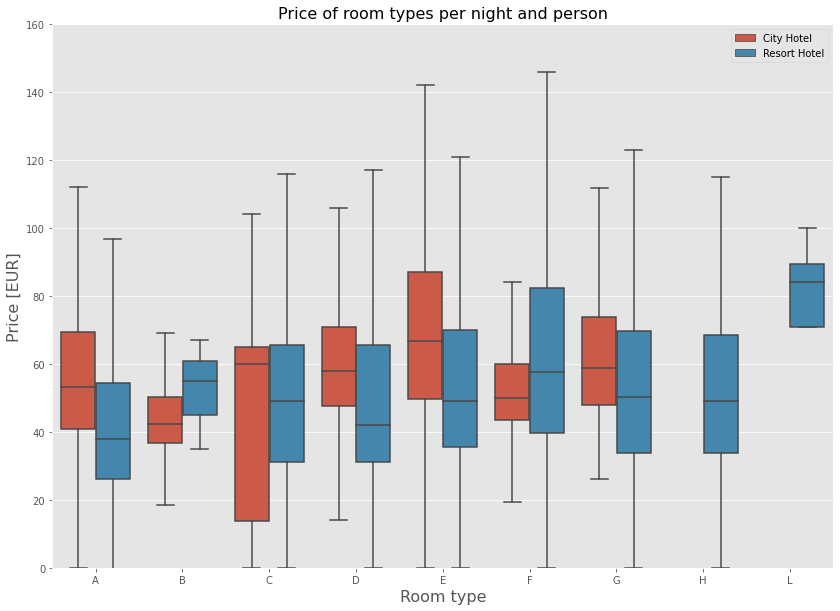

In [ ]:
# boxplot:
plt.figure(figsize=(14, 10))
sns.boxplot(x="reserved_room_type",
            y="adr_pp",
            hue="hotel",
            data=room_prices, 
            hue_order=["City Hotel", "Resort Hotel"],
            fliersize=0)
plt.title("Price of room types per night and person", fontsize=16)
plt.xlabel("Room type", fontsize=16)
plt.ylabel("Price [EUR]", fontsize=16)
plt.legend(loc="upper right")
plt.ylim(0, 160)
plt.show()

This figure shows the average price per room, depending on its type and the standard deviation

How does the price per night vary over the year?

In [ ]:
# grab data:

room_prices_monthly = df_guests[["hotel", "arrival_date_month", "adr_pp"]].sort_values("arrival_date_month")
room_prices_monthly

,hotel,arrival_date_month,adr_pp
48869,City Hotel,April,81.90
110757,City Hotel,April,65.25
110758,City Hotel,April,65.25
110759,City Hotel,April,45.00
110760,City Hotel,April,65.25
...,...,...,...
43519,City Hotel,September,31.00
43518,City Hotel,September,28.00
43517,City Hotel,September,38.25
43563,City Hotel,September,45.00


In [ ]:
# order by month:

ordered_months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
room_prices_monthly["arrival_date_month"] = pd.Categorical(room_prices_monthly["arrival_date_month"], categories=ordered_months, ordered=True)

Let’s plot a barplot to see the deviation.

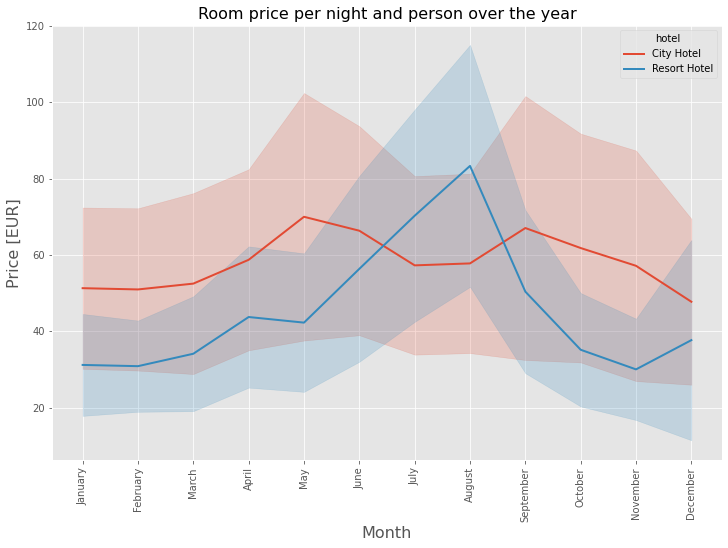

In [ ]:
# barplot with standard deviation:

plt.figure(figsize=(12, 8))
sns.lineplot(x = "arrival_date_month", y="adr_pp", hue="hotel", data=room_prices_monthly, 
hue_order = ["City Hotel", "Resort Hotel"], ci="sd", size="hotel", sizes=(2, 2))
plt.title("Room price per night and person over the year", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=90)
plt.ylabel("Price [EUR]", fontsize=16)
plt.show()

This clearly shows that the prices in the Resort hotel are much higher during the month of August. There is summer season there in portugal at that time. The price of the city hotel varies less and is most expensive during may and september where there is spring and autumn season respectively.

Weakest and strongest market segment of each hotel

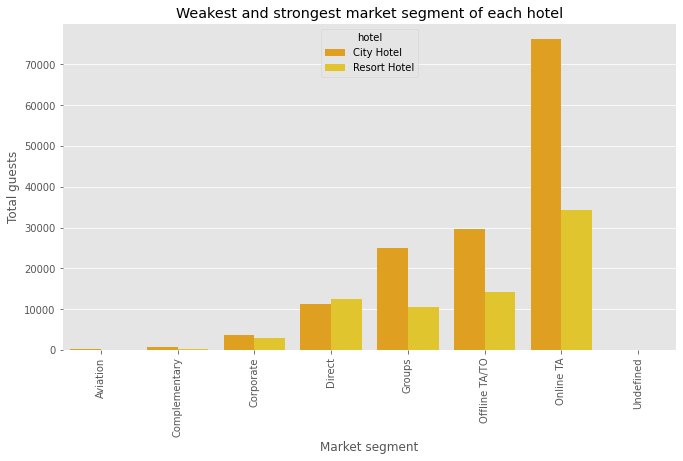

In [ ]:
# identify the weakest and strongest market segment of each hotel, so we can focused the marketing strategies in a better way 


p2 = df.pivot_table(index=['market_segment','hotel'],
                   values=['adults'],
                   aggfunc="sum").reset_index()

c2 = sns.barplot(x="market_segment",
                y="adults",
                hue="hotel",
                data=p2,
                palette = "Wistia_r")
plt.xticks(rotation=90)
plt.title("Weakest and strongest market segment of each hotel")
plt.ylabel("Total guests")
plt.xlabel("Market segment")
sns.despine(bottom = True, left = True)
fig = plt.gcf()
fig.set_size_inches(11,6)
plt.show()

The market segment that is bookings most of the guests is Online travel Agency followed by offline Travel Agency.Aviation,Complementary, and Corporate have very poor numbers when it comes to bookings

In [ ]:
df['total_guests'] = df['adults'] + df['children'] + df['babies']

In [ ]:
df['price_per_guest'] = (df['adr']/df["total_guests"])

In [ ]:
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

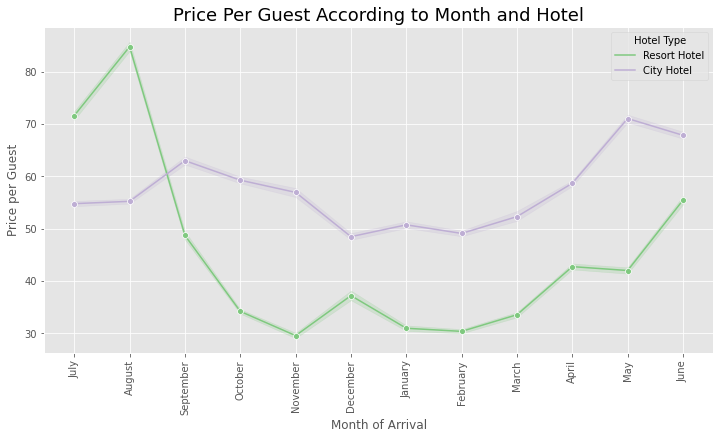

In [ ]:
# price per guest according the month 
plt.figure(figsize = (12,6))
fig = sns.lineplot(x = 'arrival_date_month', y = 'price_per_guest', hue = 'hotel', data = df, palette="Accent", marker = "o")

plt.xticks(rotation=90)
plt.xlabel('Month of Arrival')
plt.ylabel('Price per Guest')
plt.legend(title = 'Hotel Type')
plt.title('Price Per Guest According to Month and Hotel', fontsize = 18);

There is a peak on the prices for the Resort hotel is between July and August
There is a peak on the prices for the City hotel is on May and mid September

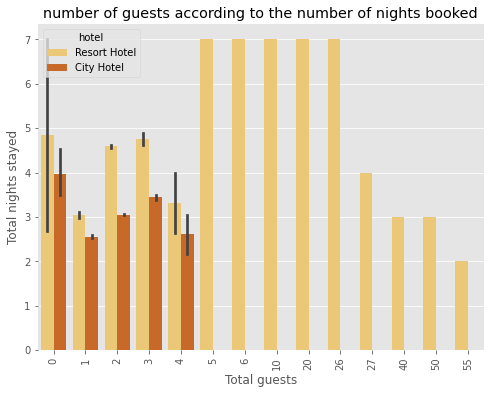

In [ ]:
# Number of guests according to the number of nights booked

plt.figure(figsize = (12,6))
fig = sns.barplot(x = 'adults', y = 'total_nights', hue = 'hotel', data = df, palette="YlOrBr")

plt.xticks(rotation=90)
plt.xlabel('Total guests')
plt.ylabel('Total nights stayed')
plt.title('number of guests according to the number of nights booked') 
sns.despine(bottom = True, left = True)
fig = plt.gcf()
fig.set_size_inches(8,6)
plt.show()

The most common number of nights that a reservation with 1 guest stays on the hotel is between 1 and 2 nights and Reservations with 2, 3, 4 and 5 guests normally stayed on the hotel between 3 and 5 nights.

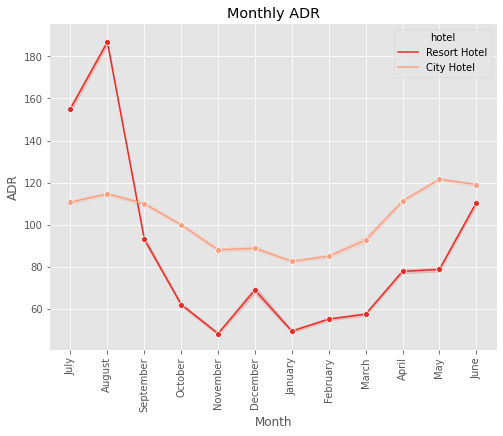

In [ ]:
# Monthly ADR

plt.figure(figsize = (12,6))
fig = sns.lineplot(x ='arrival_date_month', 
             y = 'adr', 
             hue = 'hotel', 
             data = df,
                  palette="Reds_r",
                   marker = "o")

plt.xticks(rotation=90)
plt.xlabel('Month')
plt.ylabel('ADR')
plt.title('Monthly ADR') 
sns.despine(bottom = True, left = True)
fig = plt.gcf()
fig.set_size_inches(8,6)
plt.show()

prices increase a lot during the peak season between July and August.The best time to book in the hotels if you want to have the lowest price is January and November.

Answering Questions

Q1: How many guests are there who have repeatedly canceled the bookings?

In [ ]:
#Using countplot by seaborn
df['is_repeated_guest'] = df['is_repeated_guest'].replace(0,'No')
df['is_repeated_guest'] = df['is_repeated_guest'].replace(1,'Yes')

In [ ]:
print(df['is_repeated_guest'])

0         No
1         No
2         No
3         No
4         No
          ..
119385    No
119386    No
119387    No
119388    No
119389    No
Name: is_repeated_guest, Length: 119390, dtype: object


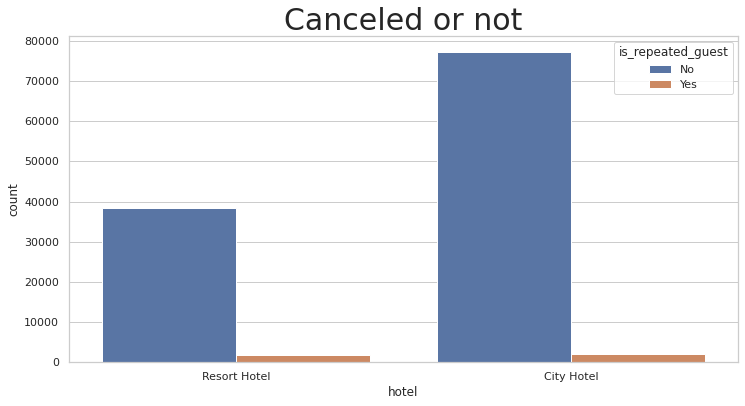

In [ ]:
sns.set(style = "whitegrid")
plt.title("Canceled or not", fontdict = {'fontsize': 30})
canceled = sns.countplot(x = df.hotel, hue = 'is_repeated_guest', data = df)

Q2: Let’s check in which hotel people like to stay and spend more time.

We will check this on weekdays and weekends separately, because we might see a skew distribution here. First let’s plot the boxplot market segment wise and we will first check for the week nights stay. The market segment will tell us what type of stay is it.

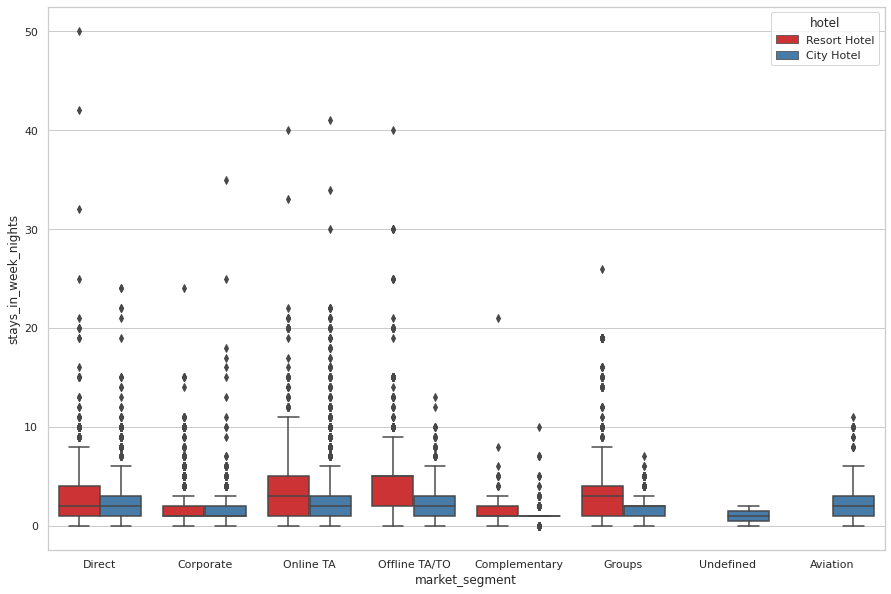

In [ ]:
plt.figure(figsize = (15,10))
sns.boxplot(x = "market_segment", y = "stays_in_week_nights", data = df, hue = "hotel", palette = 'Set1');

Now let’s plot the boxplot market segment wise and we will now check for the weekends stay.

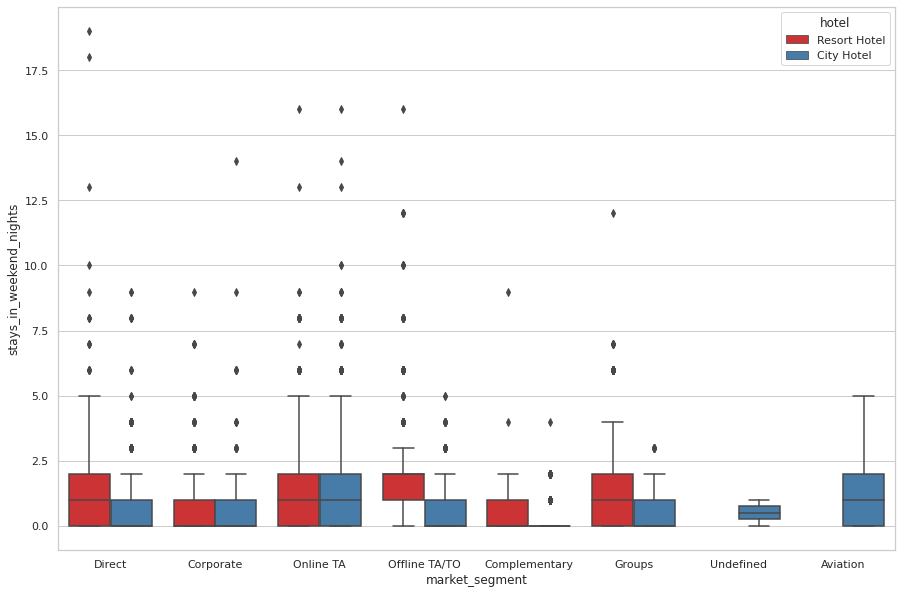

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(x = "market_segment", y = "stays_in_weekend_nights", data = df, hue = "hotel", palette = 'Set1');

It can be seen that most of the groups are normally distributed, some of them have high skewness. Looking at the distribution, it can be concluded that most people do not seem to prefer to stay at the hotel for more than 1 week. But it seems normal to stay in resort hotels for up to 12–13 days. Although this changes according to the segments, staying longer than 15 days certainly creates outliers for each segment.

If the total time feature was created by summing up the weekend and week nights, this would be clearer

As it turns out, customers from Aviation Segment do not seem to be staying at the resort hotels and have a relatively lower day average. Apart from that, the weekends and weekdays averages are roughly equal.

Let’s plot the countplot by market segment distribution.

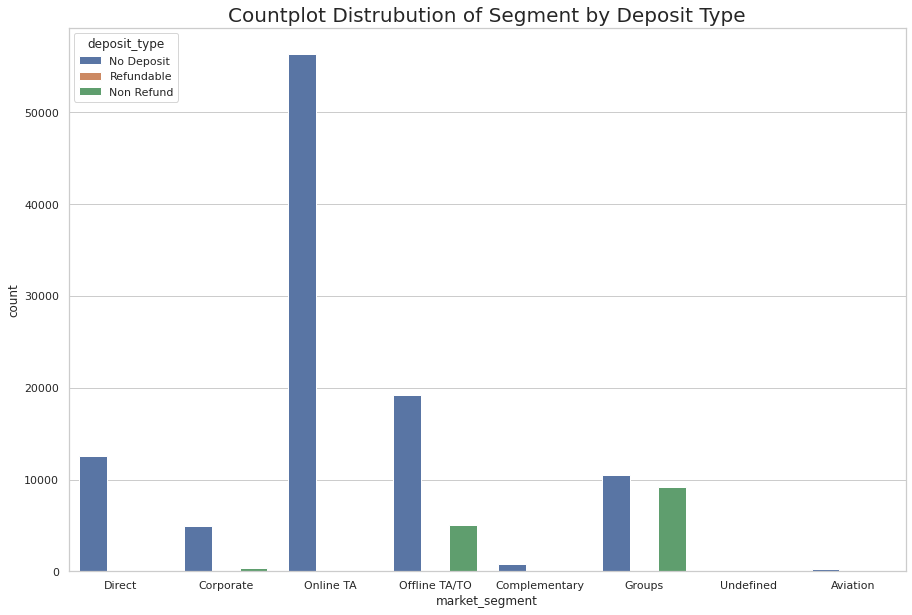

In [ ]:
plt.figure(figsize = (15,10))
sns.set(style = "whitegrid")
plt.title("Countplot Distrubution of Segment by Deposit Type", fontdict = {'fontsize':20})
ax = sns.countplot(x = "market_segment", hue = 'deposit_type', data = df)

Q3: What is the effects of deposit on cancellations by segments.

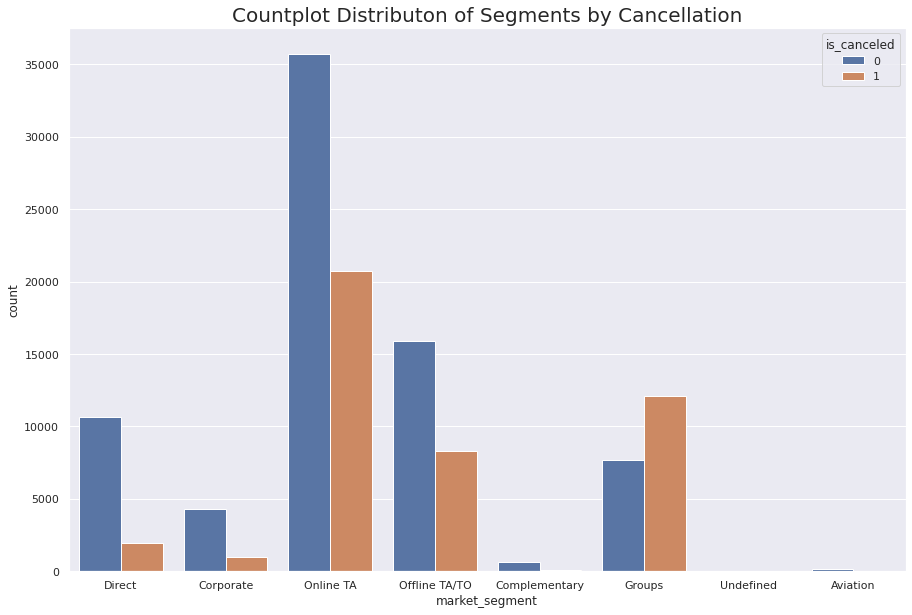

In [ ]:
#Let’s check the countplot distribution by cancellation in those market segments
plt.figure(figsize = (15,10))
sns.set(style = "darkgrid")
plt.title("Countplot Distributon of Segments by Cancellation", fontdict = {'fontsize':20})
ax = sns.countplot(x = "market_segment", hue = 'is_canceled', data = df)

When looking at Offline TA/TO and Groups, the only circumstances in which the payment was received were those in which the groups arrived. Applying a deposit for a sizable number of guests who will occupy a sizable portion of the hotel’s capacity is quite logical.

I first assumed that the market segments where a deposit is applied would have a lower cancellation rate than the segments where no deposit is applied. However, it appears that this is not the case when we look at the cancellations according to the segments in the other representation.

The cancellation rate for groups is greater than 50%.

The cancellation rate for offline TA/TOs (Travel Agents/Tour Operators) and online TAs is greater than 33%.

Direct segments have a lower rate of cancellation.

Online reservation cancellation rates are typical for a dynamic environment with significant circulation.

The fact that the cancellation rate in the direct segment is so low is another issue that caught my attention. In the event when people are speaking one-on-one, I believe that a mutually trusting relationship has been built at this time. I won’t linger too much on this, but I believe there is a psychological element at play.

Q4: What is the relationship of lead time with cancellation.

In [ ]:
#We will plot a density curve of lead time by cancellation.
df['is_canceled'] = df['is_canceled'].replace(0,'No')
df['is_canceled'] = df['is_canceled'].replace(1,'Yes')

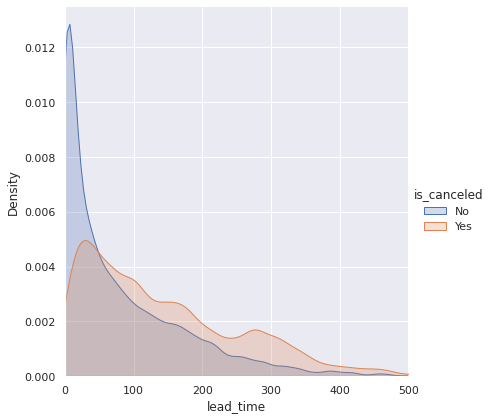

In [ ]:
(sns.FacetGrid(df, hue = 'is_canceled',
             height = 6,
             xlim = (0,500))
    .map(sns.kdeplot, 'lead_time', shade = True)
    .add_legend());

When the lead time exceeds about 60, guests frequently cancel their bookings (cancellation rate is higher after this point). Additionally, people want their vacation or work schedules to be calculated across 100 days, or 50% of the data.

Q5: What is the monthly customers each hotel is receiving?

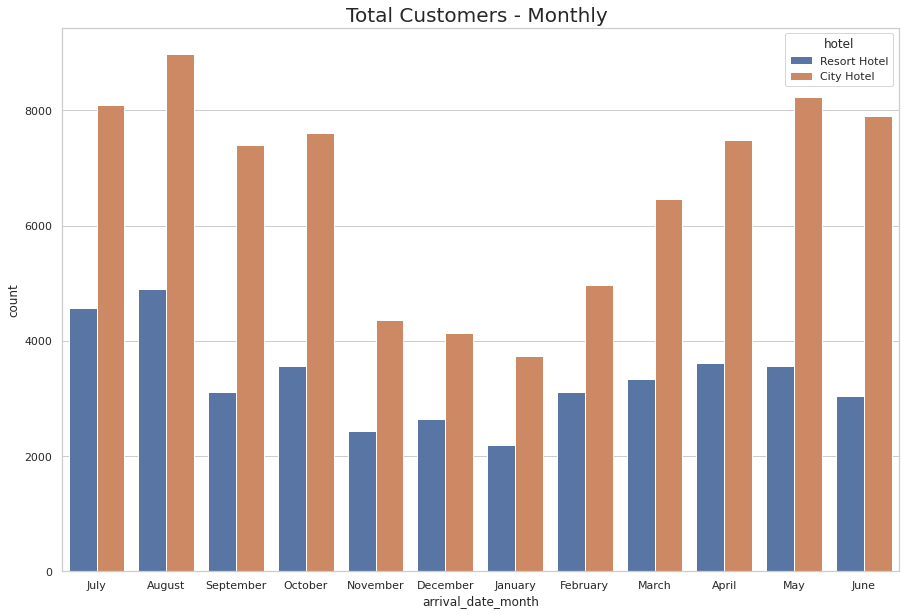

In [ ]:
plt.figure(figsize =(15,10))
sns.set(style="whitegrid")
plt.title("Total Customers - Monthly ", fontdict={'fontsize': 20})
ax = sns.countplot(x = "arrival_date_month", hue = 'hotel', data = df)

The first graph shows that city hotels receive more guests throughout the year. Resort hotels appear to be slightly closer to city hotels in the summer when comparing proportions.

Q6: Which are the most busy month?

In [ ]:
# Create a DateFrame with the relevant data:
resort_guests_monthly = resort_hotel.groupby("arrival_date_month")["hotel"].count()
city_guests_monthly = city_hotel.groupby("arrival_date_month")["hotel"].count()

resort_guest_data = pd.DataFrame({"month": list(resort_guests_monthly.index),
                    "hotel": "Resort hotel", 
                    "guests": list(resort_guests_monthly.values)})

city_guest_data = pd.DataFrame({"month": list(city_guests_monthly.index),
                    "hotel": "City hotel", 
                    "guests": list(city_guests_monthly.values)})
full_guest_data = pd.concat([resort_guest_data,city_guest_data], ignore_index=True)

In [ ]:
# order by month:
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
full_guest_data["month"] = pd.Categorical(full_guest_data["month"], categories=ordered_months, ordered=True)

In [ ]:
# Dataset contains July and August date from 3 years, the other month from 2 years. Normalize data:
full_guest_data.loc[(full_guest_data["month"] == "July") | (full_guest_data["month"] == "August"),
                    "guests"] /= 3
full_guest_data.loc[~((full_guest_data["month"] == "July") | (full_guest_data["month"] == "August")),
                    "guests"] /= 2

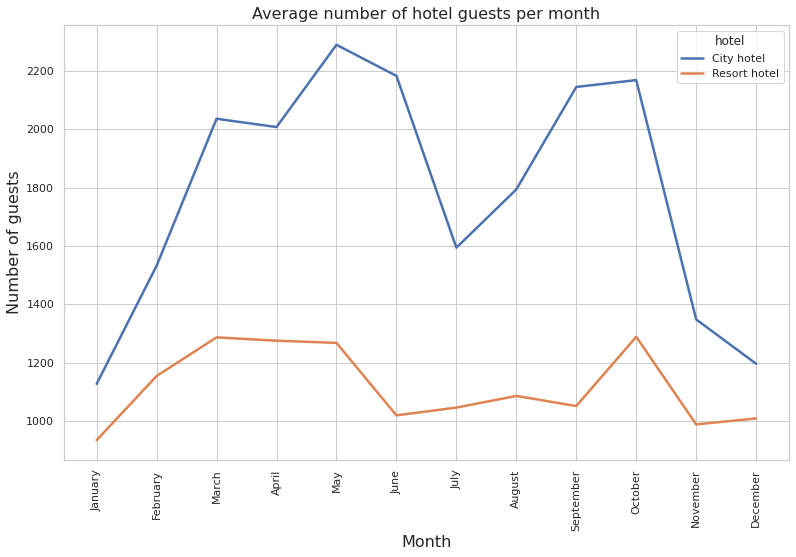

In [ ]:
#show figure:
plt.figure(figsize=(13, 8))
sns.lineplot(x = "month", y="guests", hue="hotel", data=full_guest_data, 
             hue_order = ["City hotel", "Resort hotel"], size="hotel", sizes=(2.5, 2.5))
plt.title("Average number of hotel guests per month", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=90)
plt.ylabel("Number of guests", fontsize=16)
plt.show()

The City Hotel sees an increase in visitors in the spring and fall when rates are also the greatest. Less people arrive in July and August, when the prices are still lower.

From June through September, when costs are at their greatest, fewer guests stay at the Resort hotel. The winter season draws the fewest visitors to both hotels.

Q7- How many bookings were canceled?

In [ ]:
# absolute cancelations:
total_cancelations = df["is_canceled"].sum()
resort_cancelations = df.loc[df["hotel"] == "Resort Hotel"]["is_canceled"].sum()
city_cancelations = df.loc[df["hotel"] == "City Hotel"]["is_canceled"].sum()

In [ ]:
# as percent:
rel_cancel = total_cancelations / df.shape[0] * 100
rh_rel_cancel = resort_cancelations / df.loc[df["hotel"] == "Resort Hotel"].shape[0] * 100
ch_rel_cancel = city_cancelations / df.loc[df["hotel"] == "City Hotel"].shape[0] * 100

In [ ]:
print(f"Total bookings canceled: {total_cancelations:,} ({rel_cancel:.0f} %)")
print(f"Resort hotel bookings canceled: {resort_cancelations:,} ({rh_rel_cancel:.0f} %)")
print(f"City hotel bookings canceled: {city_cancelations:,} ({ch_rel_cancel:.0f} %)")

Total bookings canceled: 11,085 (51 %)
Resort hotel bookings canceled: 11,085 (51 %)
City hotel bookings canceled: 0 (nan %)


Recommendation

1)I wanted to show in a plot the peak season bookings with children compared to bookings without children, why?. The same reason i use the pie plots showing percentage of adults, children and babies,the food in any hotel is actually some of the most important aspects to take in consideration when you are looking where to stay on vacation, and in the other hand it also represent a big expense for the hotel, so mi idea was using this charts and plots to create an strategie with the Menu in each hotel, depending the time of the year and the type of hotel considering percentage of customer type, would also be a great idea to register in a dataset the wasted of food that the hotel has each day and also the type off food (if is mostly for kids or for adults) and then use this information to make a menu that adapt perfectly to each season and type of guest and reduce the waste in the food, wich will automatically reduce expenses to the hotel.

2)The percentage of cancellations per month is actually very high, being around 40% for the City hotel and around 30% for the Resort hotel. that is almost half of the bookings being cancelled, should recomend to go deep into this scenario, a great tool would be a survey that you need to fill in order to make a cancelation where the guest explain what is the reason of the cancelation, then create a dataset with all the common reasons, and data of the guests for 2 things : 1st to take actions and improve in each area that is making the guests cancel the bookings and 2nd to make a Machine Learning model so we can predict the risk of cancelation of each booking.

3)In the type of customer that each market segment is attracting there is not a big difference related to the other charts showing market segment bookings, we can notice that most bookings are Transient and Transient-party so my recommendation and most of the bookings are through online and offline travel agencies, as i see it other market segment should try to replicate what travel agencies are doing in order to get more bookings.

4)Transient and Transient-Party guests are the most common guests in the hotel, my recommendation would be to implement strategies to attract more contract guests and group guests, it can be done by having yearly subscriptions for this type of guests and give them benefits that differentiates them from regular Transient and Transient-Party guests.

5)Most tourists come from Europe since the top 5 countries are in Europe, in 1st place Portugal followed by the Uk and France, so it would be great taking this information in consideration in the Food, Decoration, Rules, Activities and schedules so the guests can feel in their environment, that would make them probably come back in their next vacations.

6)The "price per guest according to month" graphic is very similar to the ADR graphic or the peak season graphic, this would be an useful resource to use on the websites or travel agencies flyers so we can attract customers on the non-peak season months, with the clear benefits for the customers that would be for a very low price compared to peak season months.

7)We can notice that most of the bookings are for the room type "A" followed by the "D", we can notice as well that room types "C", "H", "B", have very few reservations compared to room type "A" and we also notice that room type "L" has 0 bookings. So my recommendation would be transforming all room types that have very low bookings, to room types "A", "D" or even "E" to maximize bookings and usable space in the hotel.

8)The output data shows the number of nights stayed based on the number of guests in the reservation, with this we can predict how many nights each room type is going to be occupied depending on the number of guests that the room type supports, this could be a great tool for logistics and organization fo the hotels.

9)The most common number of adults per reservations is 2 adults, based on this output hotels can manage to optimize activites, restaurants, commodities, even spaces taking in consideration these number.

10)The peak season is the most profitable time for the hotel based on the ADR, but for those months like January and November hotel should bring up new ways to increase revenue in the hotel. For example: organizing tours, entertainment shows or maybe also an exclusive party, to keep guests interested and captivate more bookings for this specific months.

11)From the BI point of view, if Hotels are having a lot of empty parking spaces, maybe should be considered to transform some parking spaces into spaces that can bring value or revenue to the hotels.

12)Logistic responsible on the Resort hotel should be aware that 20% of the guests are probably going to require at leats 1 parkings space, and be sure that parkings spaces are always enough to fit all the cars.

13)Agent with ID #9 could be further analysed to check if it's possible to replicate results on other agents to drive booking numbers upward.

Conclusion

We’ve drawn many inferences from the survey. Here’s a summary of a few of them:

It appears that a disproportionately high number of bookings are from Portugal, probably because the hotel is located in Portugal itself. The second country is the United Kingdom which is approx. 75% behind.

From all non-canceled bookings, across all room types and meals, the average prices are: — Resort hotel: 47.56 € per night and person. — City hotel: 59.29 € per night and person.

The prices in the Resort hotel are much higher during the month of August. There is summer season there in portugal at that time. The price of the city hotel varies less and is most expensive during may and september where there is spring and autumn season respectively.

Repeated guests do not cancel their reservations. Of course there are some exceptions. Also most of the customers are not repeated guests.

Most people do not seem to prefer to stay at the hotel for more than 1 week. But it seems normal to stay in resort hotels for up to 12–13 days. Although this changes according to the segments, staying longer than 15 days certainly creates outliers for each segment.

Customers from Aviation Segment do not seem to be staying at the resort hotels and have a relatively lower day average.

The weekends and weekdays averages are roughly equal.

Customers in the Aviation Segment are likely to arrive shortly due to business. Also probably most airports are a bit away from sea and its most likely to be closer to city hotels.

The cancellation rate for groups is greater than 50%.

The cancellation rate for offline TA/TOs (Travel Agents/Tour Operators) and online TAs is greater than 33%.

Direct segments have a lower rate of cancellation.

When the lead time exceeds about 60, guests frequently cancel their bookings (cancellation rate is higher after this point). Additionally, people want their vacation or work schedules to be calculated across 100 days, or 50% of the data.

City hotels receive more guests throughout the year. Resort hotels appear to be slightly closer to city hotels in the summer when comparing proportions.

The City Hotel sees an increase in visitors in the spring and fall when rates are also the greatest. Less people arrive in July and August, when the prices are still lower.

From June through September, when costs are at their greatest, fewer guests stay at the Resort hotel. The winter season draws the fewest visitors to both hotels.
